## Master Sciences de l'Ingénieur, Mentions Mécanique, Robotique et Electronique

# TP1 Traitement numérique du signal : analyse d'un écoulement turbulent à partir de Transformées de Fourier Discrètes

***
## Remarques préliminaires


* il n'y a pas de compte-rendu à rendre à la fin de la séance mais vous pouvez (devez) prendre des notes,
* les fichiers nécessaires pour faire ce TP sont disponible sur Moodle,
* ce TP ne nécessite pas de connaissances approfondies de mécanique des fluides.
***

## 1 Présentation du problème
Un écoulement de couche de mélange est l'écoulement produit lorsque 2 écoulements 
de vitesses différentes se rejoignent.
C'est un écoulement de base en mécanique des fluides car il permet d'observer le développement 
spatial des tourbillons et surtout la fusion 
de ces tourbillons entre eux qui est responsable du développement spatial de la couche de mélange 
mais surtout de source de bruit dans le cas d'écoulements à haute vitesse.

Lorsque l'on effectue une mesure d'un champ de vitesse ou de la pression dans un écoulement turbulent,
 le signal de vitesse obtenu met en évidence 
des mouvements périodiques dus à la présence des mouvements tourbillonnaires 
(qui passent de façon quasi-périodique) de taille différente.
L'objectif de ce TP est d'utiliser les Transformées de Fourier Discrètes pour analyser les mouvements tourbillonnaires de cet écoulement (cf la vidéo sur Moodle). 


La figure 1 montre un champ instantané  de vorticité de cet écoulement. La vorticité correspond au rotationnel du champ de vitesse et 
permet de mettre en évidence les zones tourbillonnaires de cet écoulement. 
Sur cette figure, on peut observer qu'en amont des tourbillons de petite taille se forment.
Puis lors de leur développement spatial, ils fusionnent pour former des plus gros tourbillons et ainsi de suite.

3 sections sont ainsi retenues ($x_1$, $x_2$, et $x_3$) dans lesquelles un signal du champ de pression a été extrait en un point de l'écoulement.
Vous disposez donc de 3 signaux de pression $p_1[n]$, $p_2[n]$ et $p_3[n]$ dépendant seulement du temps. Ces données sont contenues dans les fichiers pression_x1.mat, pression_x2.mat et pression_x3.mat respectivement.

Tous ces signaux contiennent $n_t=6666$ points et leur fréquence d'échantillonnage est $f_e=1333$Hz soit une durée totale d'acquisition de $5$ s. 

<img height="100" src="vorti_instan.png" >
Figure 1 : instantané de la vorticité

## 2  Représentations temporelles et fréquentielles des signaux p1, p2 et p3

In [1]:
# On appelle les biblothèques de fonctions utiles pour la suite
# Ne pas modifier cette cellule
%matplotlib notebook
import numpy as np
import pylab as plt
from scipy.io.matlab import mio

### 1 Lecture des données

In [2]:
# Ne pas modifier cette cellule
x1 = mio.loadmat('pression_x1.mat')
p1 = np.array(x1['p1'])[0]
x2 = mio.loadmat('pression_x2.mat')
p2 = np.array(x2['p2'])[0]
x3 = mio.loadmat('pression_x3.mat')
p3 = np.array(x3['p3'])[0]

# les signaux de pression sont contenus dans les tableaux p1, p2, p3

### Créer un tableau de dimension $n_t$, noté $T$ contenant les échantillons temporels.
### Tracer le signal $p1[n] $ en fonction de $T[n]$. 

Construction de $T[n]$

In [3]:
NT = len(p1) # Marche aussi
Fe = 1333.0  # en Hz
Te = 1/Fe    # en s
T = np.arange(0, NT*1/Fe, 1/Fe)

Visualisation du signal $p1[n]$

<IPython.core.display.Javascript object>


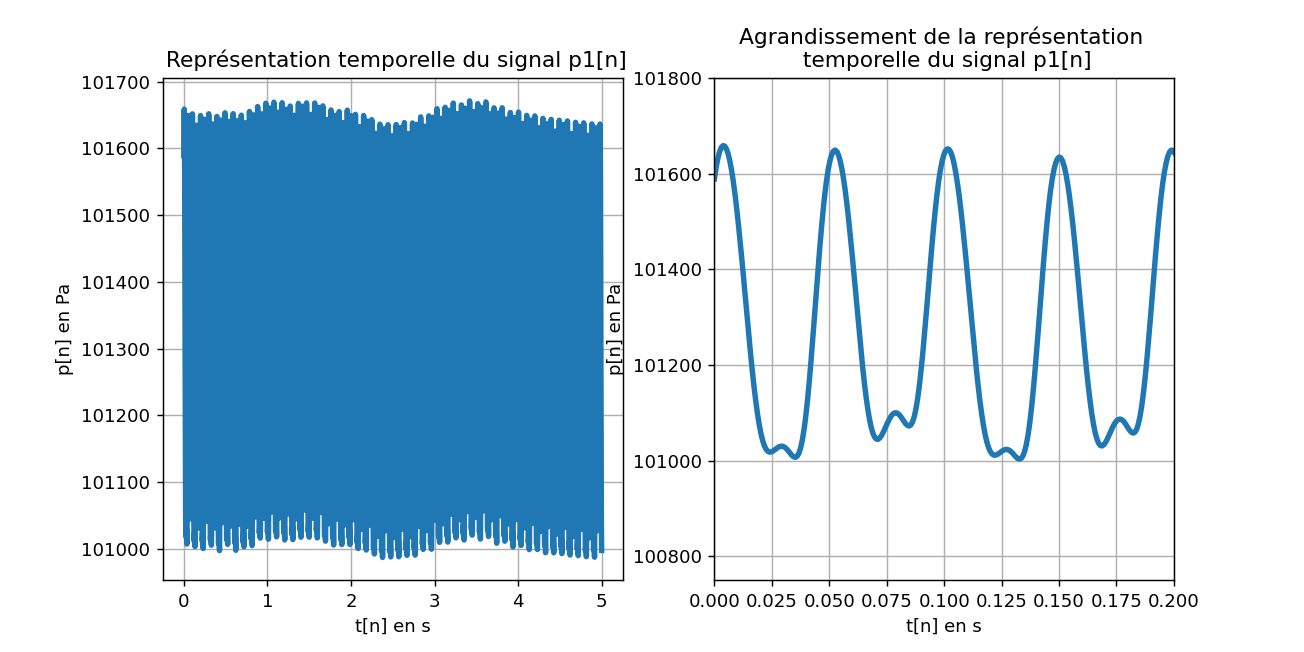

In [4]:
plt.figure(figsize=(10,5))

# Tracé temporel
plt.subplot(1,2,1)
plt.plot(T, p1, lw=3)
plt.xlabel('t[n] en s')
plt.ylabel('p[n] en Pa')
plt.title(u'\n Représentation temporelle du signal p1[n]')
plt.grid()

# Tracé fréquentiel
plt.subplot(1,2,2)
plt.plot(T, p1, lw=3)
plt.xlabel('t[n] en s')
plt.ylabel('p[n] en Pa')
plt.title(u'Agrandissement de la représentation \n temporelle du signal p1[n]')
plt.grid()
plt.axis((0,0.2,100750, 101800));

### 2 Quelles sont les valeurs moyennes des signaux p1[n], p2[n] et p3[n] ? A partir de ces valeurs, construire les 3 signaux de pression fluctuante à moyenne nulle. Ces signaux seront toujours utilisés par la suite et notées p1m[n], p2m[n] et p3m[n]

In [5]:
print("La valeur moyenne de p1 est ", np.mean(p1))
print("La valeur moyenne de p2 est ", np.mean(p2))
print("La valeur moyenne de p3 est ", np.mean(p3))

La valeur moyenne de p1 est  101259.83840688756
La valeur moyenne de p2 est  101279.33583084871
La valeur moyenne de p3 est  101280.35649424317


On constate que ce signal a une valeur moyenne non nulle. On veut supprimer cette valeur. A partir de p1[n], constuisez un nouveau signal, p1m[n] de moyenne nulle.

### 3 Représenter sur un même graphique ces 3 signaux de pression fluctuante en fonction du temps. Limiter la durée temporelle de représentation (par exemple prendre une durée de 0,25s) pour mieux visualiser cette représentation. Qu’observez vous ?

<IPython.core.display.Javascript object>


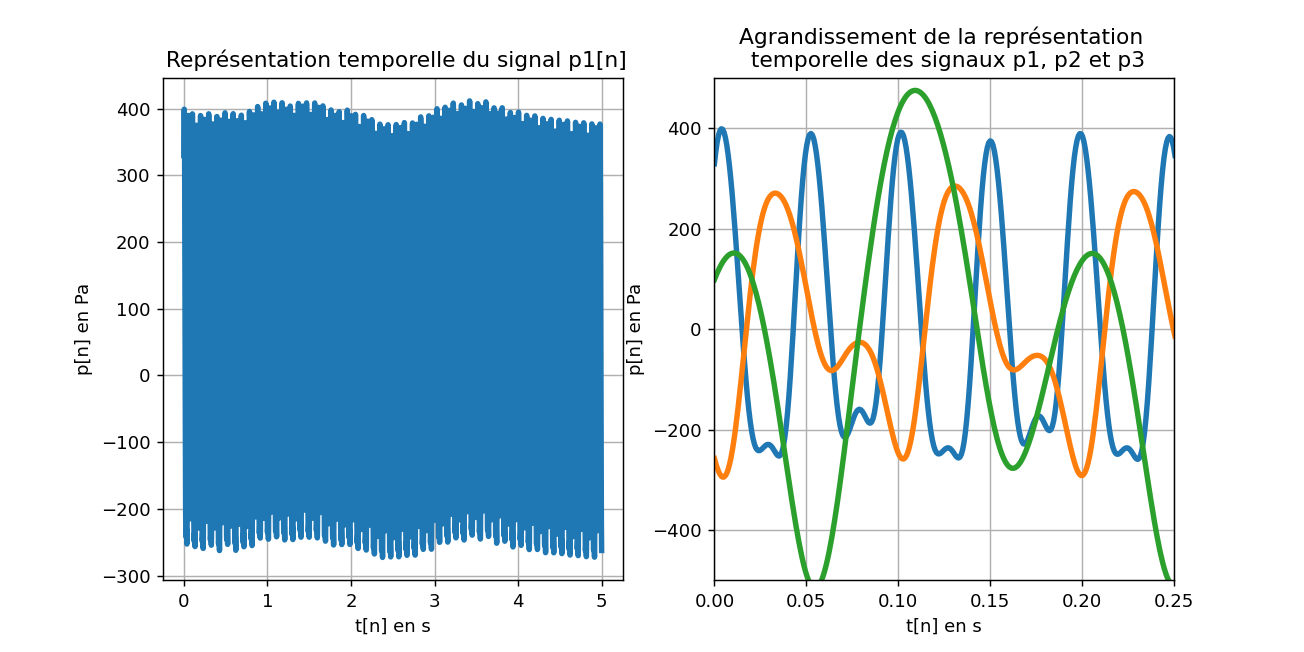

(0.0, 0.25, -500.0, 500.0)

In [5]:
# Calcul des signaux à moyenne nulle
p1m = p1 - np.mean(p1)
p2m = p2 - np.mean(p2)
p3m = p3 - np.mean(p3)

# Représentation temporelle du signal p1
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(T, p1m, lw=3)
plt.xlabel('t[n] en s')
plt.ylabel('p[n] en Pa')
plt.title(u'\n Représentation temporelle du signal p1[n]')
plt.grid()

# Représentation temporelle zommée des 3 signaux de pression
plt.subplot(1,2,2)
plt.plot(T, p1m, lw=3)
plt.plot(T, p2m, lw=3)
plt.plot(T, p3m, lw=3)
plt.xlabel('t[n] en s'); plt.ylabel('p[n] en Pa'); plt.title(u'Agrandissement de la représentation \n temporelle des signaux p1, p2 et p3'); plt.grid()
plt.axis((0,0.25,-500,500))

## 2.2 Représentation fréquentielle

### 4 Construire le vecteur contenant les fréquences discrètes. Comment est défini ce vecteur ?

In [6]:
# On utilise la fonction fftfreq
f = np.fft.fftfreq(NT, 1/Fe)

# cf. https://numpy.org/doc/stable/reference/generated/numpy.fft.fftfreq.html pour voir comment ce vecteur est constitué

### 5 Calculer les spectres associés à ces 3 signaux de pression. On les notera p1mw[k], p2mw[k] et p3mw[k] (on pourra consulter l’aide en ligne de la fonction fft pour comprendre son utilisation). Tracer sur trois figures différentes (ou superposer sur une même figure) le module des spectres de ces signaux. On pourra limiter l’axe des fréquences à [-50 : 50]Hz. Quelles différences observez-vous entre les différents spectres ? Comment expliquez-vous ces différences ?

<IPython.core.display.Javascript object>


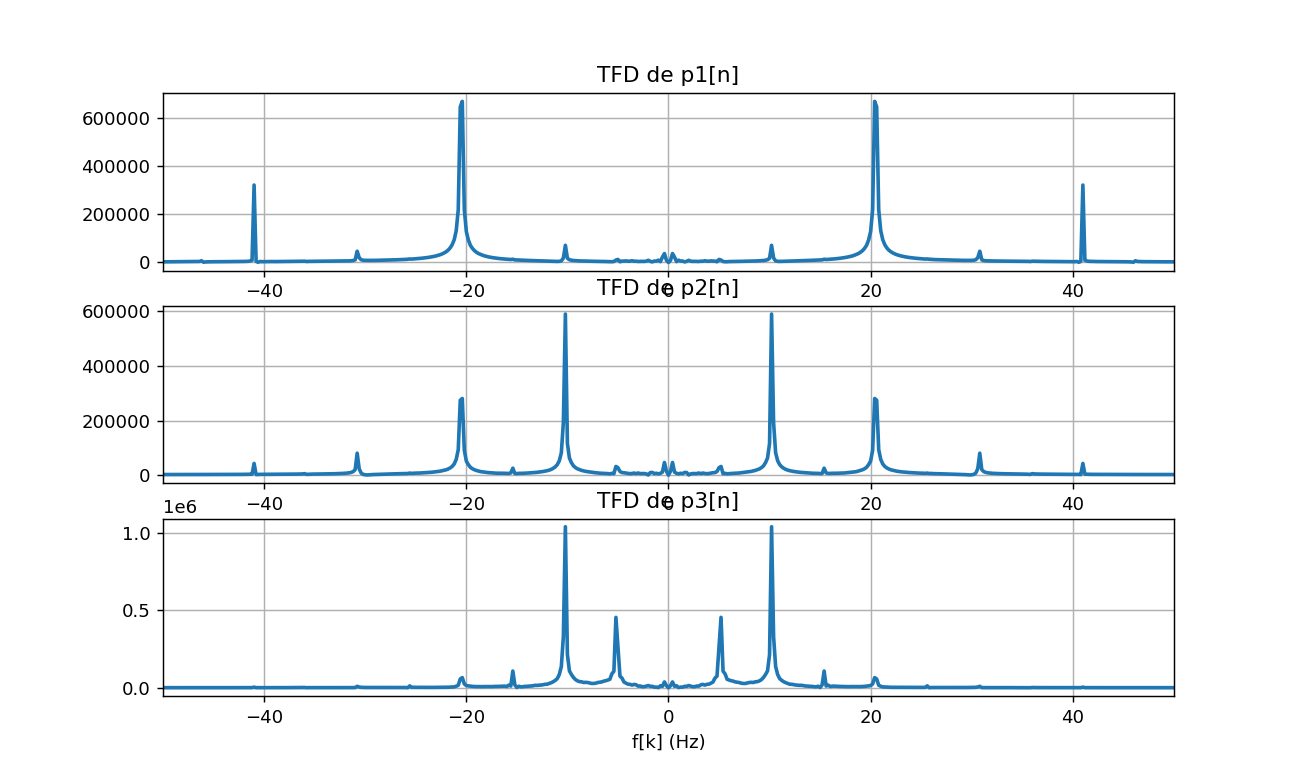

In [9]:
# Calcul des 3 FFT des 3 signaux de pression
p1mw = np.fft.fft(p1m)
p2mw = np.fft.fft(p2m)
p3mw = np.fft.fft(p3m)

lim = 50 # valeur maximale en Hz pour la visualisation du spectre

plt.figure(figsize=(10,6))
# Tracé de la FFT de p1
plt.subplot(3,1,1)
plt.plot(np.fft.fftshift(f),abs(np.fft.fftshift(p1mw)), lw=2)
plt.title('TFD de p1[n]'); plt.xlim((-lim,lim)); plt.grid()
# Tracé de la FFT de p2
plt.subplot(3,1,2)
plt.plot(np.fft.fftshift(f),abs(np.fft.fftshift(p2mw)), lw=2)
plt.title('TFD de p2[n]'); plt.xlim((-lim,lim)); plt.grid()
# Tracé de la FFT de p3
plt.subplot(3,1,3)
plt.plot(np.fft.fftshift(f),abs(np.fft.fftshift(p3mw)), lw=2)
plt.title('TFD de p3[n]'); plt.xlim((-lim,lim)); plt.grid()
plt.xlabel('f[k] (Hz)');

On constate que la fréquence de chacune des raies diminue : il y a un décalage vers les basses fréquences. Cela est dû à la fusion des "petits" vortex (donc hautes fréquences) qui donne naissance à des "gros" vortex (donc basses fréquences). 

## 3 Influence de la forme de la fenêtre d’analyse

### 3.1 Diminution de la durée d’analyse

En fait, les données sont issues d’une simulation numérique basée sur la résolution des équations
de Navier-Stokes. Les ressources informatiques nécessaires à cette simulation sont importantes
et le temps de simulation (très long) dépend du nombre d’échantillons final. En pratique,
on ne dispose jamais d’autant d’échantillons que les signaux p1, p2 et p3. On suppose à partir de
cette question que nt2 = 1998 points.

### 1 Construisez le signal p1mc[n] qui contient les nt2 premières valeurs de p1m[n]. Tracer ensuite sa représentation temporelle ainsi que son spectre.

<IPython.core.display.Javascript object>


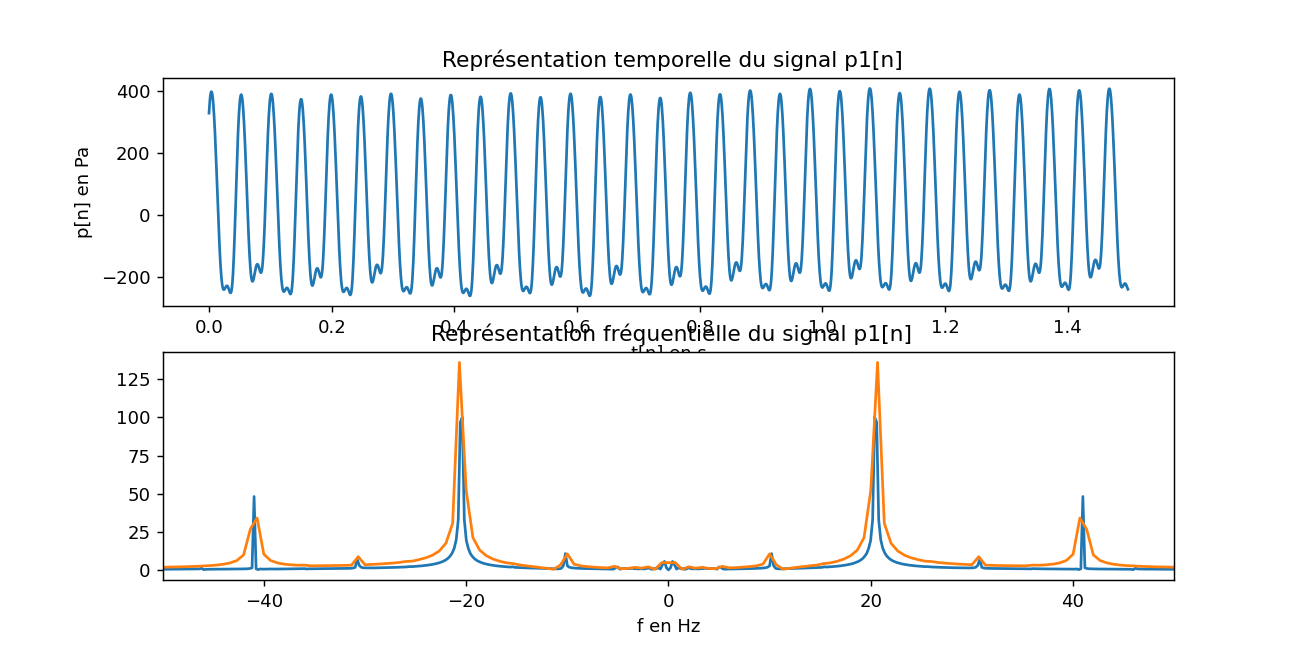

In [10]:
NT2 = 1998 # On avait NT=6666 points avant
T2 = np.arange(0, NT2*1/Fe, 1/Fe) # construction du vecteur temps

# On recopie les NT2 premiers échantillons de p1m dans p1mc
p1mc = np.zeros((NT2,))
p1mc [0:NT2] = p1m[0:NT2]
p1mcw = np.fft.fft(p1mc)

# Tracé de l'allure temporelle
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.plot(T2,p1mc)
plt.xlabel('t[n] en s')
plt.ylabel('p[n] en Pa')
plt.title(u'\n Représentation temporelle du signal p1[n]')

# Tracé de l'allure fréquentielle
f2 = np.fft.fftfreq(NT2, 1/Fe) # construction du vecteur fréquence
plt.subplot(2,1,2)
# Tracé du contenu fréquentiel AVANT réduction à NT2=1998 points (et donc sur NT=6666 points)
plt.plot(np.fft.fftshift(f),abs(np.fft.fftshift(p1mw))/NT) # bleu
# Tracé du contenu fréquentiel APRÈS réduction à NT2=1998 points
plt.plot(np.fft.fftshift(f2),abs(np.fft.fftshift(p1mcw))/NT2) # orange
plt.xlabel('f en Hz')
plt.title(u'\n Représentation fréquentielle du signal p1[n]')
plt.xlim((-50,50));

# On remarque que pour ces tracés, on a divisié le résultat de la FFT par le nombre de point utilisé pour la calculer.
# Cela permet de comparer les amplitudes des 2 spectres, calculés sur un nombre de point différent (NT vs. NT2)

### 2 Quelles différences observez-vous par rapport à la configuration précédente ?

On met en évidence que la troncature (rectangulaire ici) à 1998 points du signal de 6666 points conduit à une baisse de la résolution de l'analyse en fréquence : les lobes sont plus larges, et les petites fréquences sont maintenant presque "noyées" entre elles.

## 3.2 Etude de trois fenêtres différentes

Pour remédier à ce problème on se propose de changer la forme de la fenêtre d’analyse. On
va étudier l’influence de la forme à travers l’étude de trois fenêtres différentes.


In [11]:
# Ne pas modifier cette cellule
# Fenetre rectangle
def Rect(n,N):
    y = np.zeros_like(n)
    k=0
    for i in n:
        if((-N/2<=i)and(i<=N/2-1)):
            y[k]=1
        else:
            y[k]=0
        k = k + 1
    return y
# Fenetre triangle
def Triangle(n,N):
    y = np.zeros((len(n),))
    k=0
    for i in n:
        if((-N/2<=i)and(i<0)):
            y[k] = 1 + 2.0*np.float(i)/np.float(N)
        elif((i>=0) and (i<=N/2-1)):
            y[k] = 1 - 2.0*np.float(i)/np.float(N)
        else:
            y[k]=0
        k = k + 1
    return y
# Fenetre de Hann
def Hann(n,N):
    w = Rect(n,N)
    y = np.zeros((len(n),))
    k = 0
    for i in n:
        y[k] = w[k]*(0.5+0.5*np.cos(2*np.pi*np.float(i)/np.float(N)))
        k=k+1
    return y

Pour chacune de ces fenêtres, tracez la représentation temporelle pour $n \in [-100 : 100]$ et $M = 60$
et déterminer les propriétés de leurs spectres associés : la largeur du lobe principal (notée $L_\alpha$
avec $\alpha$ le type de fenêtre) et l’atténuation en dB de la hauteur du lobe secondaire par rapport
à la hauteur du lobe principal (ces notions sont illustrées sur la figure 2). Pour cela, tracez la
quantité suivante :
$A_{dB} = 20 \log \left( \frac{|W_\alpha(f)|}{W_\alpha(f=0)}\right)$ AdB = 20 log
où $W_\alpha$ représente le réponse en fréquences des différentes fenêtres. Cela permet de comparer
toutes les figures avec la même référence.


<img height="50" src="Illustration_TF_fenetre.png" >

### 1. Fenêtre rectangulaire. Tracer $wR[n]$ et le module de la TFD de $wR[n]$. Déterminer la largeur du lobe principal et l’atténuation entre le lobe principal et le lobe secondaire.

<IPython.core.display.Javascript object>


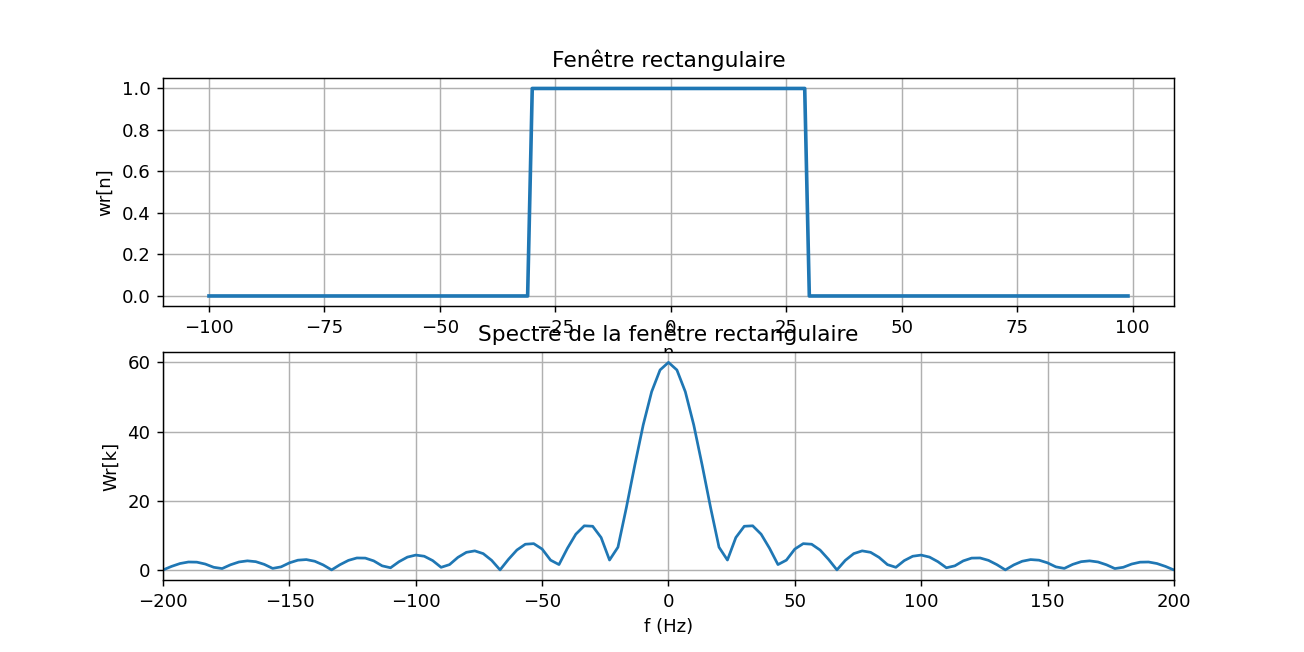

L'écart en dB est de  13.278814442673015


In [15]:
# Pour cette partie UNIQUEMENT, on effectue un tracé pour n = [-100;100]
n = np.arange(-100, 100)
N = 60 # la fenêtre en définie entre -N/2 et N/2
# Calcul les échantillons temporels pour chaque fenêtre
wR = Rect(n, N) 
# Calcul des TFD des fenêtres sur Nfft points
Nfft = len(n) # On peut prendre, et c'est même recommandé, Nfft > len(n) ! Essayez d'évaluer l'effet de Nfft.
wRw = np.fft.fft(wR,Nfft)
fw = np.fft.fftfreq(Nfft,1/Fe)

# Tracé
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.plot(n,wR, lw=2)
plt.xlabel('n'); plt.ylabel('wr[n]'); plt.title(u'Fenêtre rectangulaire'); plt.grid()
plt.subplot(2,1,2)
plt.plot(np.fft.fftshift(fw),np.fft.fftshift(abs(wRw)))
plt.xlabel('f (Hz)'); plt.ylabel('Wr[k]'); plt.title(u'Spectre de la fenêtre rectangulaire'); plt.grid()
plt.xlim((-200,200))

# On mesure (en linéaire) sur le graphique:
A_principal = 60
A_secondaire = 13.008
Adb = 20*np.log10(A_principal/A_secondaire) # NE PAS OUBLIER le LOG10, et non le LOG (qui est un ln)
print("L'écart en dB est de ", Adb)

On retrouve ici les résultats obtenus lors de TD2.

### 2. Fenêtre rectangulaire. Tracer $wT[n]$ et le module de la TFD de $wT[n]$. Déterminer la largeur du lobe principal et l’atténuation entre le lobe principal et le lobe secondaire.

<IPython.core.display.Javascript object>


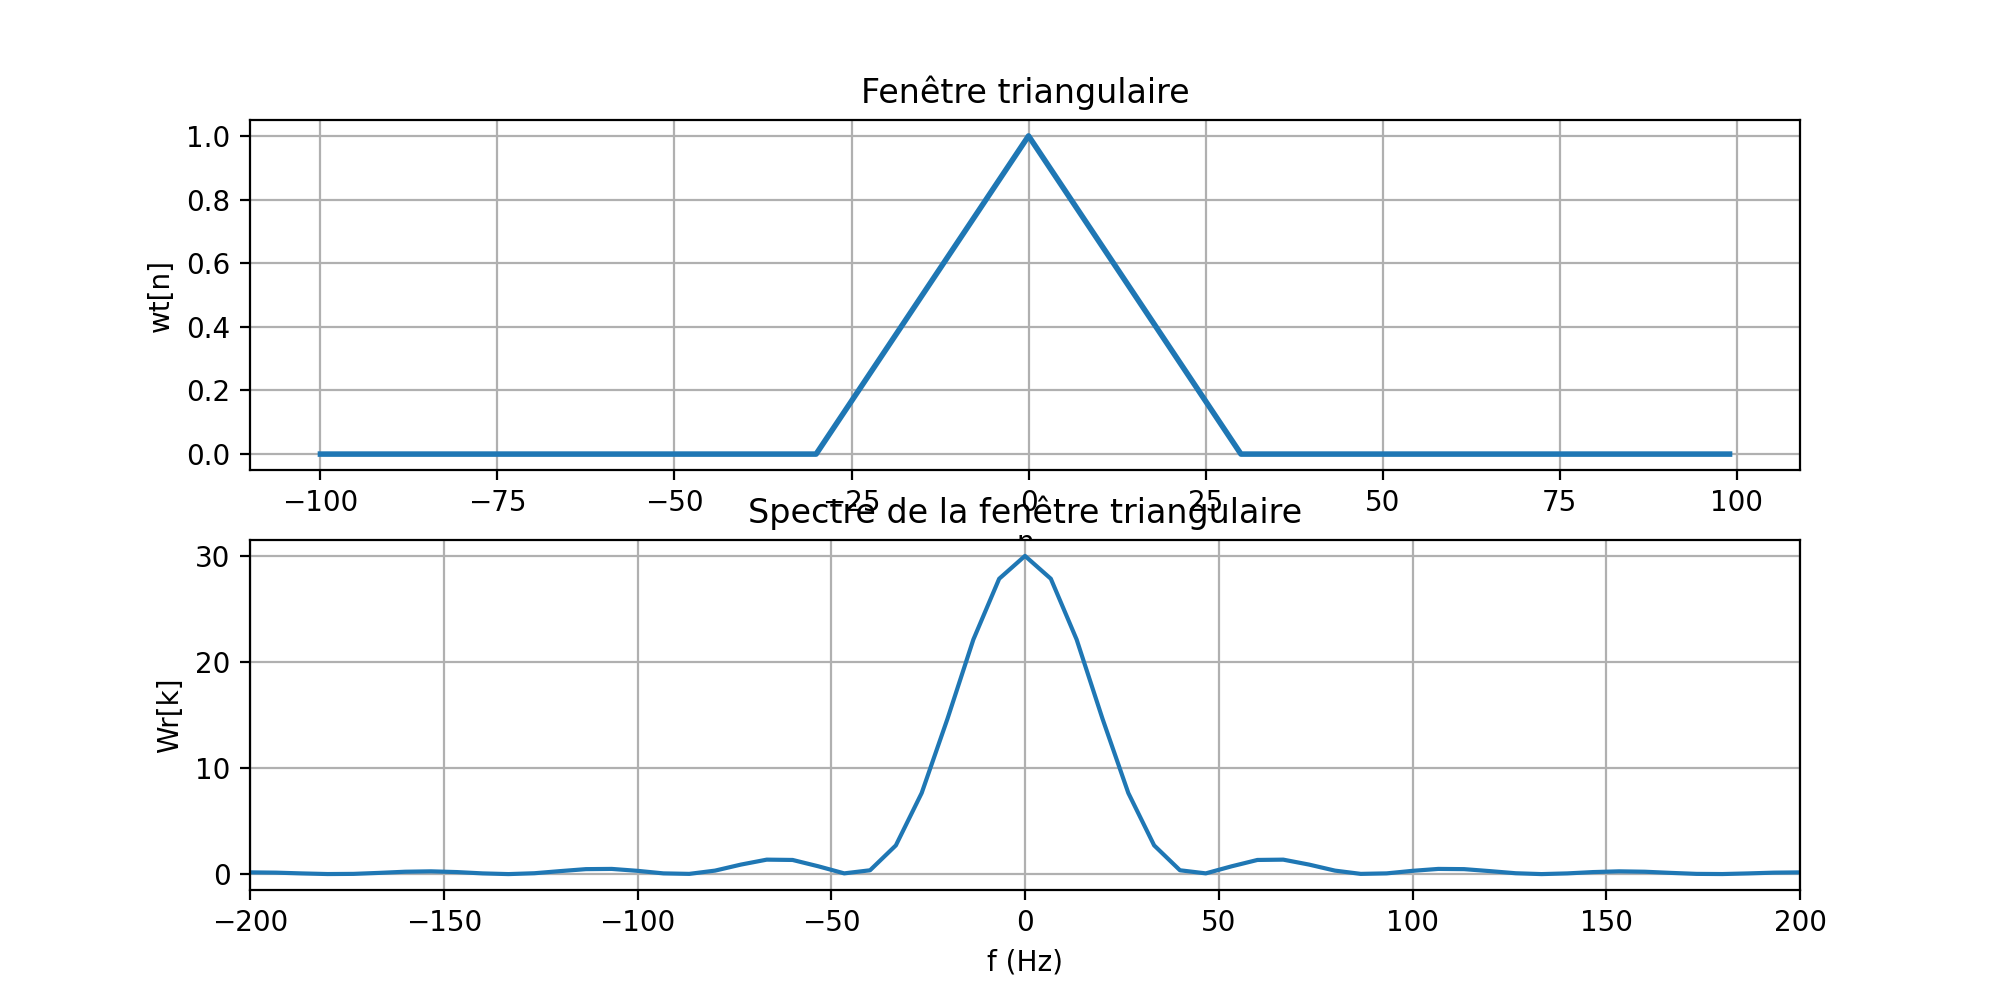

L'écart en dB est de  26.85888294285792


In [12]:
Nfft = len(n) # Même chose, ne pas hésiter à prendre une valeur de Nfft plus grande !
fw = np.fft.fftfreq(Nfft,1/Fe)

wT = Triangle(n, N)
wTw = np.fft.fft(wT,Nfft)

# Tracé
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.plot(n,wT, lw=2)
plt.xlabel('n'); plt.ylabel('wt[n]'); plt.title(u'Fenêtre triangulaire'); plt.grid()
plt.subplot(2,1,2)
plt.plot(np.fft.fftshift(fw),np.fft.fftshift(abs(wTw)))
plt.xlabel('f (Hz)'); plt.ylabel('Wr[k]'); plt.title(u'Spectre de la fenêtre triangulaire'); plt.grid()
plt.xlim((-200,200));

# On mesure (en linéaire) sur le graphique:
A_principal = 30
A_secondaire = 1.362
Adb = 20*np.log10(A_principal/A_secondaire) # NE PAS OUBLIER le LOG10, et non le LOG (qui est un ln)
print("L'écart en dB est de ", Adb)

Mettre votre commentaire ici

### 3. Fenêtre de Hann. Tracer $wH[n]$ et le module de la TFD de $wH[n]$. Déterminer la largeur du lobe principal et l’atténuation entre le lobe principal et le lobe secondaire.

<IPython.core.display.Javascript object>


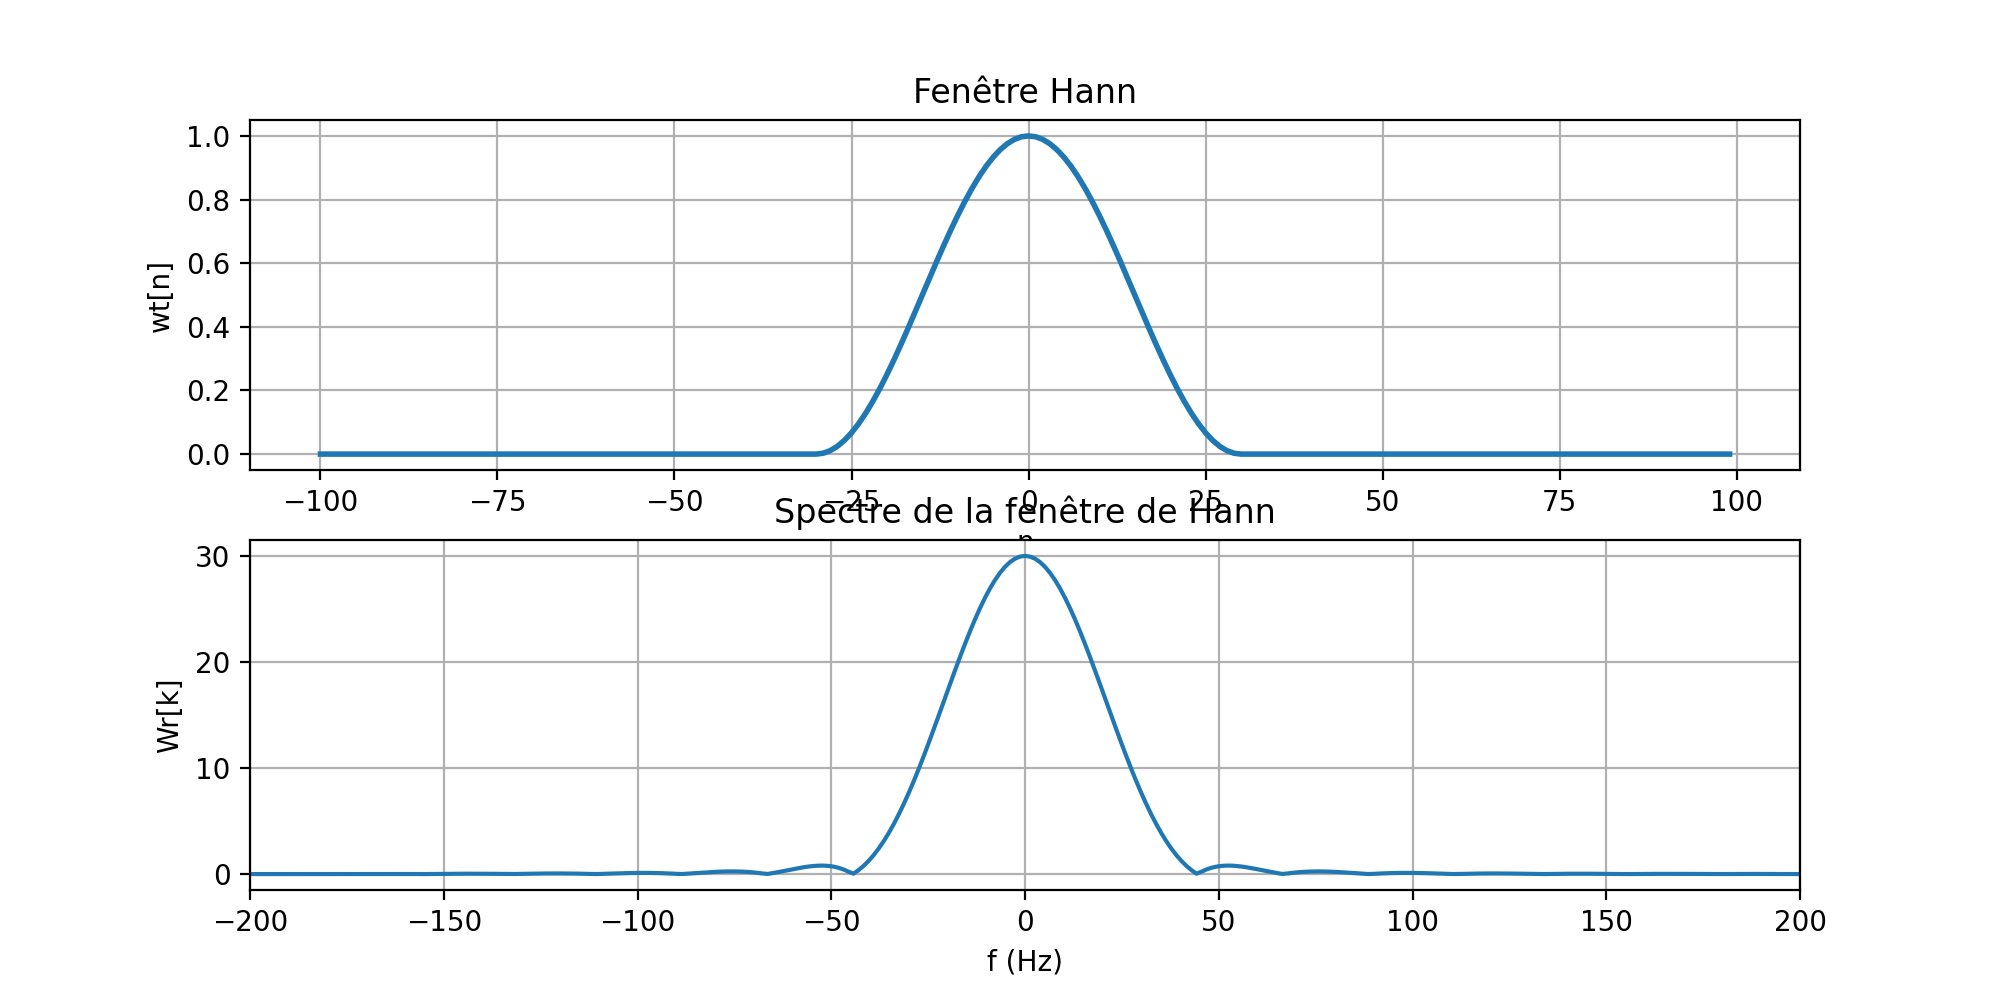

L'écart en dB est de  31.480625354554377


In [13]:
#Nfft = len(n) # Même chose, ne pas hésiter à prendre une valeur de Nfft plus grande !
Nfft = 1024
fw = np.fft.fftfreq(Nfft,1/Fe)

wH = Hann(n, N)
wHw = np.fft.fft(wH,Nfft)

# Tracé
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.plot(n,wH, lw=2)
plt.xlabel('n'); plt.ylabel('wt[n]'); plt.title(u'Fenêtre Hann'); plt.grid()
plt.subplot(2,1,2)
plt.plot(np.fft.fftshift(fw),np.fft.fftshift(abs(wHw)))
plt.xlabel('f (Hz)'); plt.ylabel('Wr[k]'); plt.title(u'Spectre de la fenêtre de Hann'); plt.grid()
plt.xlim((-200,200));

# On mesure (en linéaire) sur le graphique:
A_principal = 30
A_secondaire = 0.800
Adb = 20*np.log10(A_principal/A_secondaire) # NE PAS OUBLIER le LOG10, et non le LOG (qui est un ln)
print("L'écart en dB est de ", Adb)

### Application des fenêtres triangulaires et de Hann à l’analyse des signaux de couche de mélange

<IPython.core.display.Javascript object>


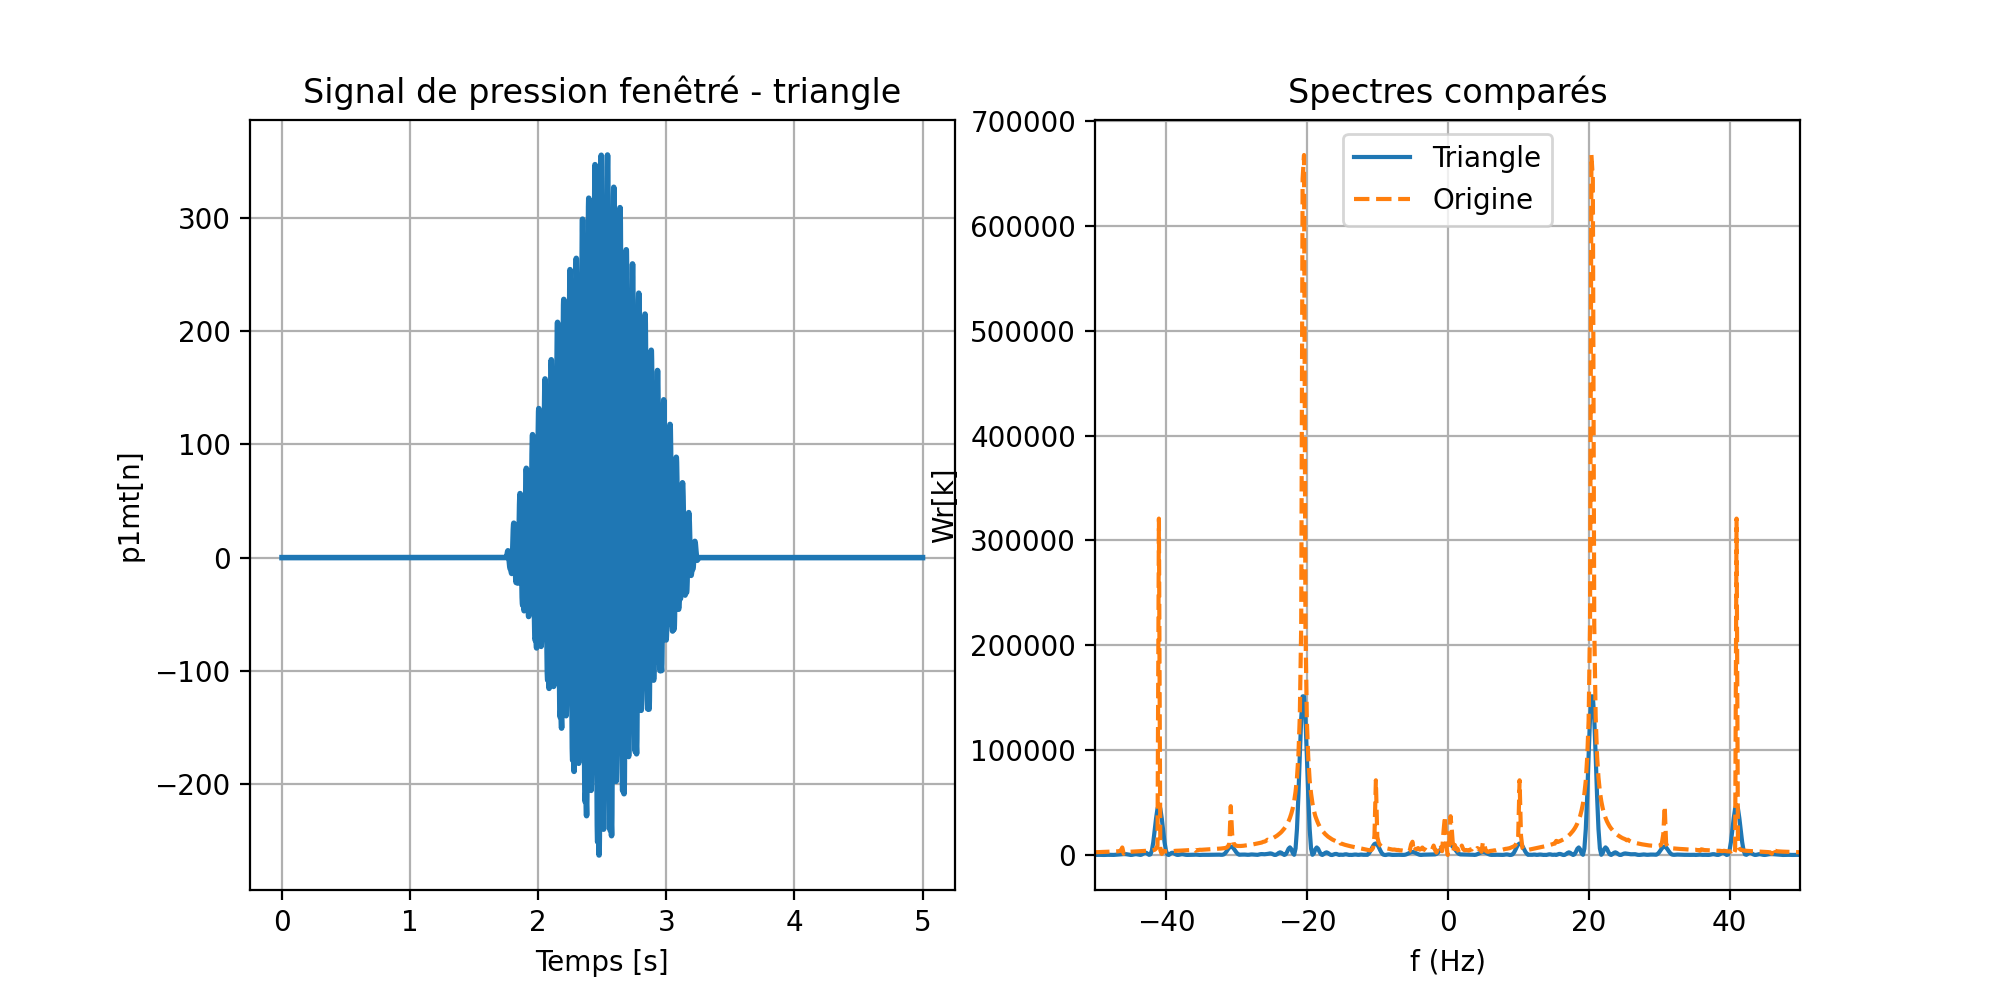

In [15]:
# On applique les fenêtres pour observer sur NT2=1998 points le signal d'origine sur NT=6666 points
# On définit donc nos fenêtres entre -NT/2 et NT/2 pour NT2 points non nuls
n = np.arange(-NT/2, NT/2)

# Fenêtre triangulaire
wT = Triangle(n, NT2)
p1mt = p1m * wT
p1mtw = np.fft.fft(p1mt)
f = np.fft.fftfreq(NT, 1/Fe)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(T,p1mt, lw=2)
plt.xlabel('Temps [s]'); plt.ylabel('p1mt[n]'); plt.title(u'Signal de pression fenêtré - triangle'); plt.grid()
plt.subplot(1,2,2)
plt.plot(np.fft.fftshift(f),np.fft.fftshift(abs(p1mtw)),label='Triangle') # Spectre du signal fenêtré
plt.plot(np.fft.fftshift(f),np.fft.fftshift(abs(p1mw)),'--',label='Origine')  # Spectre du signal d'origine
plt.legend()
plt.xlabel('f (Hz)'); plt.ylabel('Wr[k]'); plt.title(u'Spectres comparés'); plt.grid()
plt.xlim((-50,50));


Les 2 courbes en fréquences ne sont pas forcément évidentes à comparer, car elles n'ont pas la même amplitude.
Néanmoins, on voit bien l'effet de la fenêtre sur les fréquences présentent avec peu d'amplitude (par exemple, autour de 30Hz ou 40H), où le pic en fréquence est clairement plus large qu'il ne l'était avant fenêtrage : la réduction du nombre de point a là aussi, comme pour la fenêtre rectangulaire, réduit la résolution de l'analyse en fréquence.

<IPython.core.display.Javascript object>


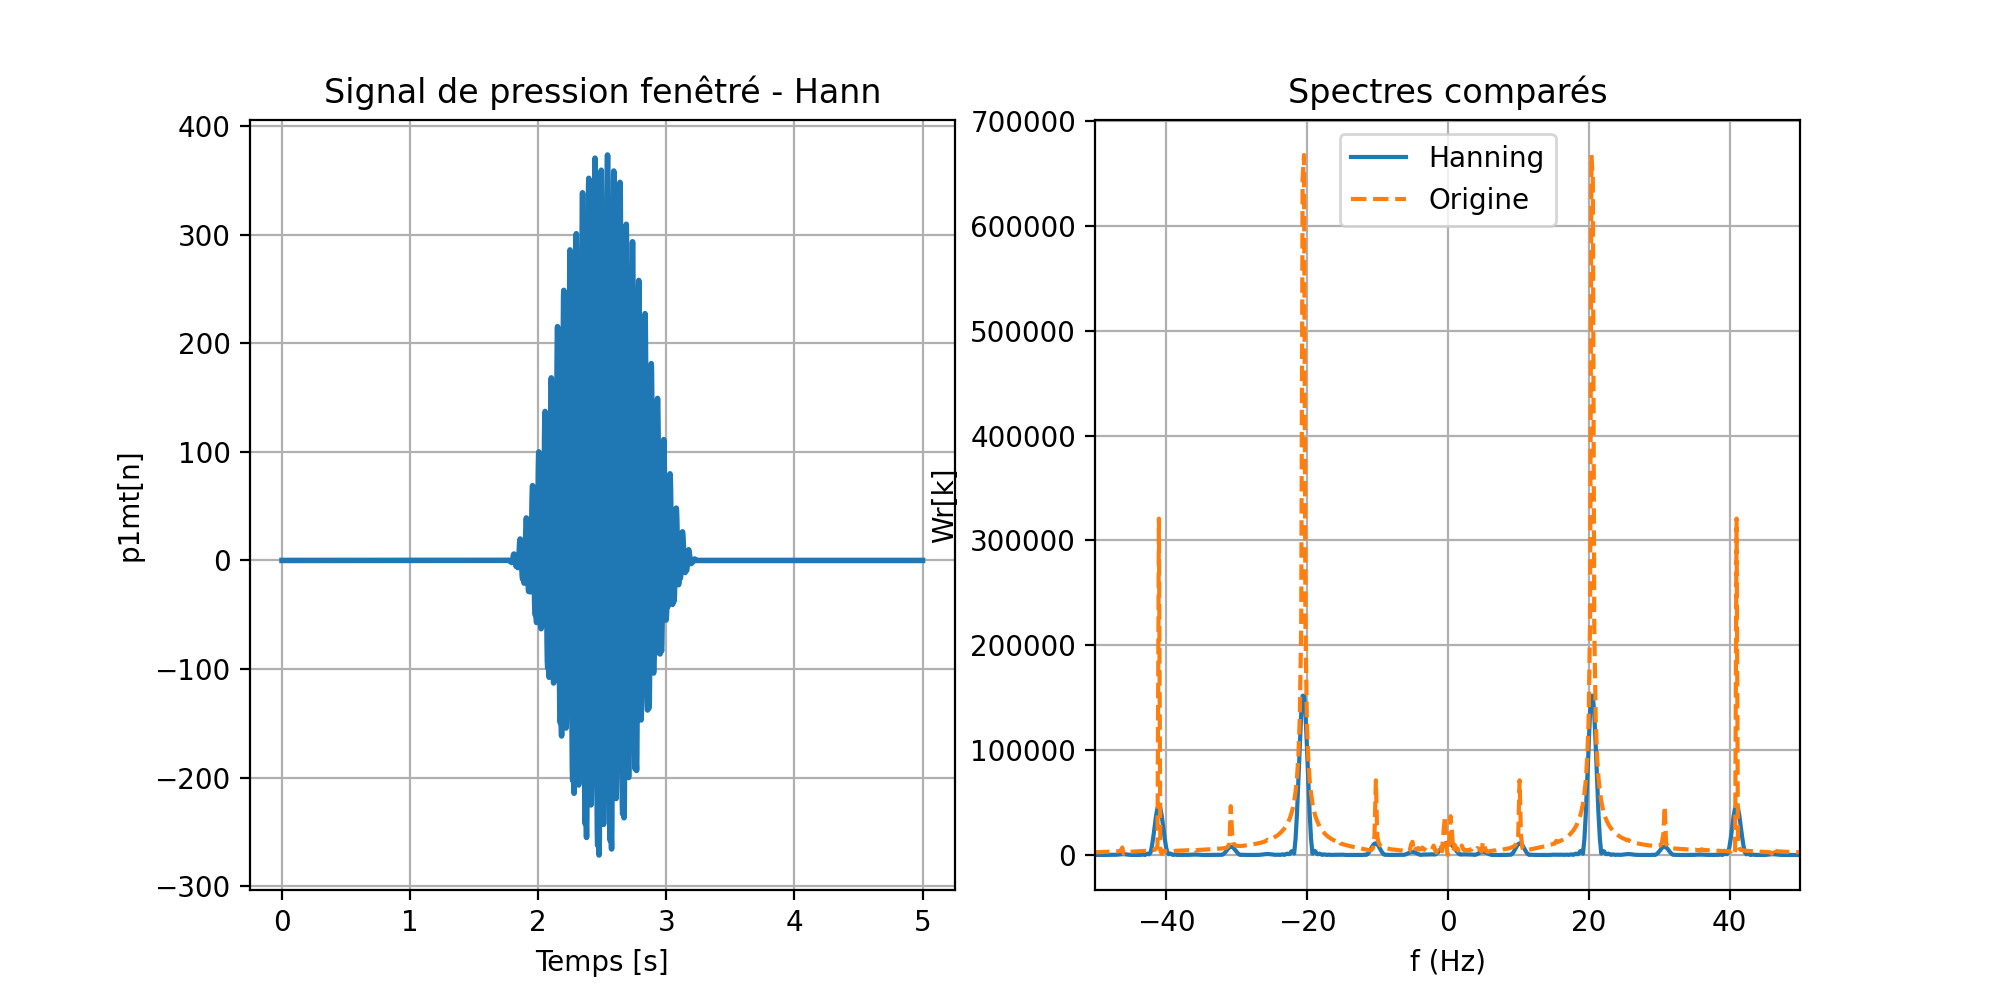

In [16]:
# Fenêtre triangulaire
wH = Hann(n, NT2)
p1mh = p1m * wH
p1mhw = np.fft.fft(p1mh)
f = np.fft.fftfreq(NT, 1/Fe)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(T,p1mh, lw=2)
plt.xlabel('Temps [s]'); plt.ylabel('p1mt[n]'); plt.title(u'Signal de pression fenêtré - Hann'); plt.grid()
plt.subplot(1,2,2)
plt.plot(np.fft.fftshift(f),np.fft.fftshift(abs(p1mhw)),label='Hanning') # Spectre du signal fenêtré
plt.plot(np.fft.fftshift(f),np.fft.fftshift(abs(p1mw)),'--',label='Origine')  # Spectre du signal d'origine
plt.legend()
plt.xlabel('f (Hz)'); plt.ylabel('Wr[k]'); plt.title(u'Spectres comparés'); plt.grid()
plt.xlim((-50,50));


Comme précédement, on observe une réduction de la résolution de l'analyse en fréquence

<IPython.core.display.Javascript object>


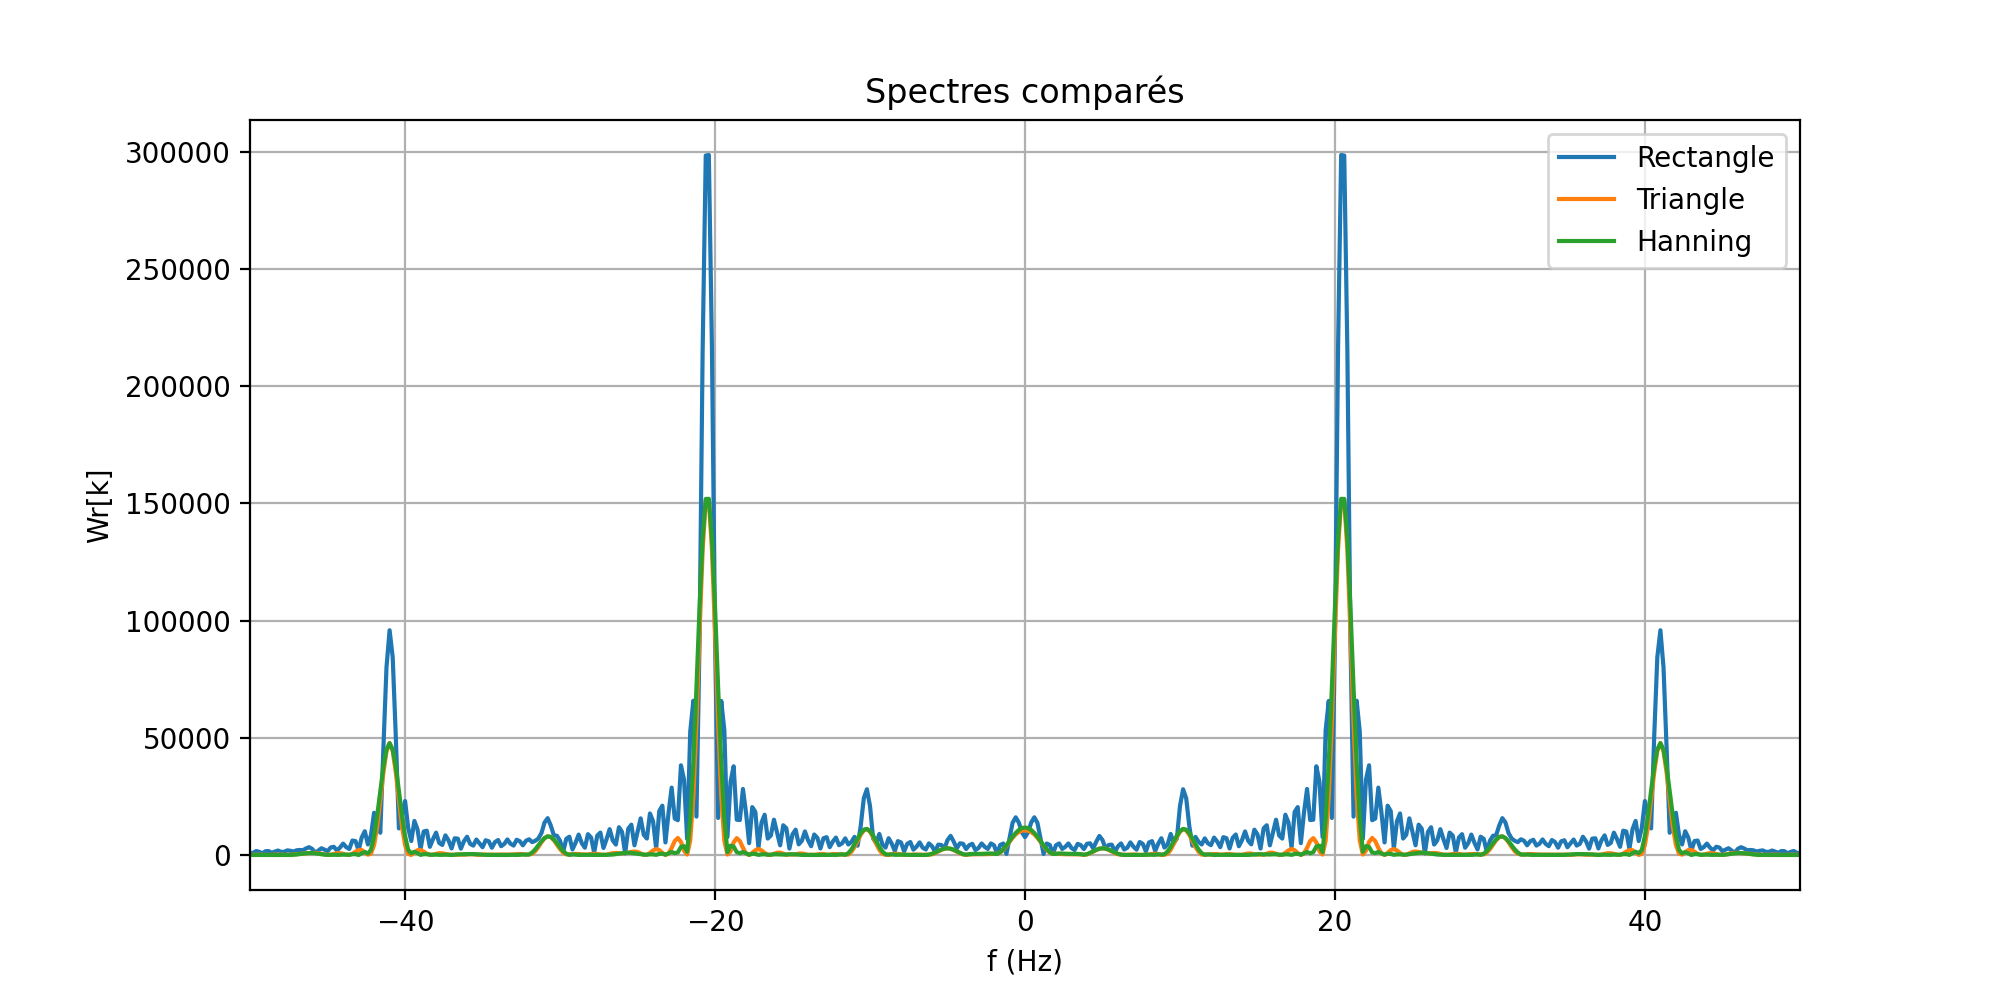

In [18]:
# Comparaison des spectres obtenus par observation à travers les 3 fenêtres par rapport au spectre d'origine

# Fenpetre rectangulaire (que nous n'avions pas encore appliquée)
wR = Rect(n, NT2)
p1mr = p1m * wR
p1mrw = np.fft.fft(p1mr)

# Tracé des 4 spectres
plt.figure(figsize=(10,5))
plt.plot(np.fft.fftshift(f),np.fft.fftshift(abs(p1mrw)),label='Rectangle') # Spectre du signal fenêtré rect
plt.plot(np.fft.fftshift(f),np.fft.fftshift(abs(p1mtw)),label='Triangle') # Spectre du signal fenêtré tri
plt.plot(np.fft.fftshift(f),np.fft.fftshift(abs(p1mhw)),label='Hanning') # Spectre du signal fenêtré hann
#plt.plot(np.fft.fftshift(f),np.fft.fftshift(abs(p1mw)),'--',label='Origine')  # Spectre du signal d'origine
plt.legend()
plt.xlabel('f (Hz)'); plt.ylabel('Wr[k]'); plt.title(u'Spectres comparés'); plt.grid()
plt.xlim((-50,50));


On retrouve les caractéristiques des 3 fenêtres mises en évidence dans l'étude précédente :
- l'observation à travers une fenêtre rectangulaire produit des lobes ('pics') plus fins, mais également des lobes secondaires nettement plus marqués. Ces lobes secondaires plus haut peuvent rendre difficile la détection de fréquences faiblement présentes dans le signal à analyser (par exemple, autour de 30Hz)
- les 2 autres fenêtres (triangulaire et Hann) ont des caractristiques proches, et comme prévu la fenêtre traingulaire montre des niveaux de lobes secondaires plus haut que la fenêtre de Hann
- on voit bien l'effet de l'élargissement des lobes liées aux fenêtres triangulaires et de Hann comparativement à la fenêtre rectangulaire **autour de 0Hz** : on distingue difficilement les 2 fréquences de part et d'autre de 0Hz avec les 2 fenêtres triangulaire ou de Hanning, alors que ces 2 fréquences apparaissent bien avec une fenêtre rectangulaire.